In [203]:
import torch
from torch import nn

import torchvision
from torchvision import datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.transforms import ToTensor

In [204]:
torch.__version__

'2.1.0+cu121'

In [205]:
train_data = datasets.FashionMNIST(root='data' , train = True , download = True , transform = ToTensor())
test_data = datasets.FashionMNIST(root='data' , train = False , download = False , transform = ToTensor())

In [206]:
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [207]:
image.shape , label

(torch.Size([1, 28, 28]), 9)

In [208]:
len(train_data.data) , len(train_data.targets) , len(test_data.data) , len(test_data.targets)

(60000, 60000, 10000, 10000)

In [209]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

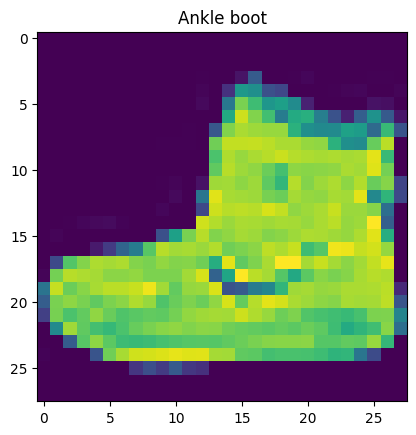

In [210]:
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

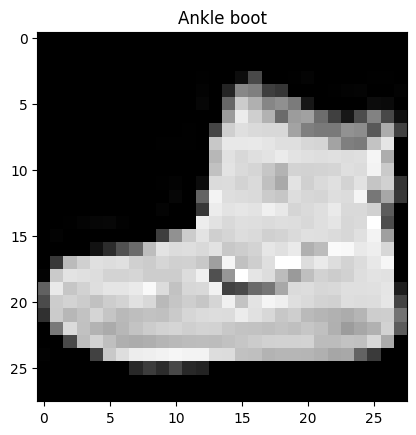

In [211]:
image , label = train_data[0]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

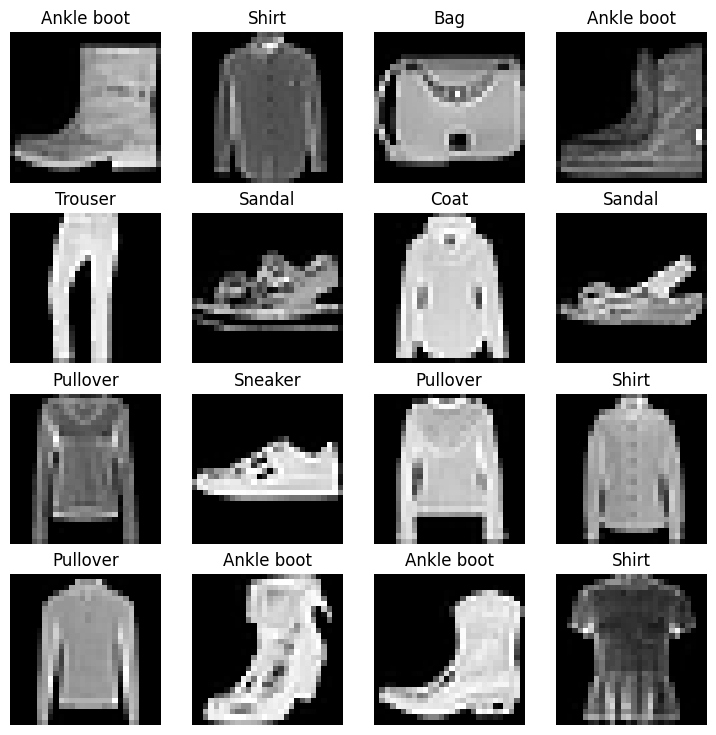

In [212]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [213]:
from torch.utils.data import DataLoader

BATCHSIZE = 32

train_dataloader = DataLoader(train_data,batch_size = BATCHSIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCHSIZE,shuffle=False)

In [214]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788a56190cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x788a56192ad0>)

In [215]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [216]:
1875 * 32 #train dataloader * batch size = train data

60000

In [217]:
313 * 32 #test dataloader * batch size = test data

10016

In [218]:
train_image_batch , train_label_batch = next(iter(train_dataloader))

In [219]:
train_image_batch.shape , train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [220]:
flatten = nn.Flatten()

x = train_image_batch[0]
flattened_x = flatten(x)

x.shape , flattened_x.shape #784 = height * width

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [221]:
28*28

784

In [222]:
class LinearClassificationOnImageDataset(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784,out_features=10),
        nn.Linear(in_features=10,out_features=len(class_names))
    )
  def forward(self , x):
    return self.layer(x)

model0 = LinearClassificationOnImageDataset()

In [223]:
model0

LinearClassificationOnImageDataset(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [224]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [225]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model0.parameters() , lr = 0.1)

In [226]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model0.train()

        ypred = model0(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model0.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model0(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")


Train loss: 0.5890565514564514 | Test loss: 0.5080767869949341 | Train Accuracy : 79.10166666666667 | Test Accuracy : 82.20846645367412 
Train loss: 0.47704583406448364 | Test loss: 0.48183298110961914 | Train Accuracy : 83.3 | Test Accuracy : 82.93730031948881 
Train loss: 0.45532429218292236 | Test loss: 0.47895535826683044 | Train Accuracy : 84.02166666666666 | Test Accuracy : 83.38658146964856 
Train loss: 0.4425123631954193 | Test loss: 0.46280863881111145 | Train Accuracy : 84.44333333333333 | Test Accuracy : 83.64616613418531 
Train loss: 0.4359712302684784 | Test loss: 0.4682779014110565 | Train Accuracy : 84.63333333333334 | Test Accuracy : 83.41653354632588 
Train loss: 0.4292164742946625 | Test loss: 0.4591047465801239 | Train Accuracy : 85.01333333333334 | Test Accuracy : 83.80591054313099 
Train loss: 0.42474231123924255 | Test loss: 0.4887252151966095 | Train Accuracy : 85.17333333333333 | Test Accuracy : 83.31669329073482 
Train loss: 0.4227548837661743 | Test loss: 0.47

In [227]:
trainacc

85.28166666666667

In [228]:
testacc

83.6361821086262

In [229]:
#using non linearity

In [230]:
class ClassificationUsingNonLinearity(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=len(class_names)),
        nn.ReLU()
    )

  def forward(self , x):
    return self.layer(x)

model1 = ClassificationUsingNonLinearity()

In [231]:
model1

ClassificationUsingNonLinearity(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [232]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [233]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model1.train()

        ypred = model1(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model1.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model1(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")


Train loss: 0.8335872292518616 | Test loss: 0.5096576809883118 | Train Accuracy : 69.56333333333333 | Test Accuracy : 81.96884984025559 
Train loss: 0.48884913325309753 | Test loss: 0.5071532726287842 | Train Accuracy : 82.49166666666666 | Test Accuracy : 81.87899361022365 
Train loss: 0.4561465084552765 | Test loss: 0.47994813323020935 | Train Accuracy : 83.495 | Test Accuracy : 83.0870607028754 
Train loss: 0.436858594417572 | Test loss: 0.46138322353363037 | Train Accuracy : 84.06833333333333 | Test Accuracy : 83.34664536741214 
Train loss: 0.4269719421863556 | Test loss: 0.5124261379241943 | Train Accuracy : 84.29833333333333 | Test Accuracy : 80.84065495207668 
Train loss: 0.4176119565963745 | Test loss: 0.44492629170417786 | Train Accuracy : 84.68333333333334 | Test Accuracy : 83.92571884984025 
Train loss: 0.41154226660728455 | Test loss: 0.4635468125343323 | Train Accuracy : 84.9 | Test Accuracy : 83.49640575079871 
Train loss: 0.4062603712081909 | Test loss: 0.4529901146888733

In [234]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*49,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model2 = CNN()

In [235]:
model2

CNN(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [236]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
imagetemp = images[0]
images.shape , imagetemp.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [237]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model2.parameters(),lr=0.1)

In [238]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model2.train()

        ypred = model2(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model2.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model2(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")


Train loss: 0.599373459815979 | Test loss: 0.39401736855506897 | Train Accuracy : 78.09166666666667 | Test Accuracy : 86.51158146964856 
Train loss: 0.35342705249786377 | Test loss: 0.3392254412174225 | Train Accuracy : 87.25333333333333 | Test Accuracy : 87.40015974440895 
Train loss: 0.318148136138916 | Test loss: 0.3205569088459015 | Train Accuracy : 88.585 | Test Accuracy : 88.4285143769968 
Train loss: 0.2968829572200775 | Test loss: 0.3101958632469177 | Train Accuracy : 89.26 | Test Accuracy : 88.83785942492013 
Train loss: 0.28255435824394226 | Test loss: 0.2933026850223541 | Train Accuracy : 89.71166666666667 | Test Accuracy : 89.30710862619809 
Train loss: 0.26900890469551086 | Test loss: 0.29502609372138977 | Train Accuracy : 90.32166666666667 | Test Accuracy : 89.48682108626198 
Train loss: 0.26126042008399963 | Test loss: 0.29313039779663086 | Train Accuracy : 90.44666666666667 | Test Accuracy : 89.11741214057508 
Train loss: 0.25518354773521423 | Test loss: 0.2740295529365

In [239]:
#actual test image and label
import random
random.seed(42)
test_image = []
test_label = []
for i , j in random.sample(list(test_data),k=9):
  test_image.append(i)
  test_label.append(j)

In [240]:
test_image , test_label

([tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [241]:
test_image[0].shape , test_label[0] , class_names[test_label[0]]

(torch.Size([1, 28, 28]), 5, 'Sandal')

Text(0.5, 1.0, 'Sandal')

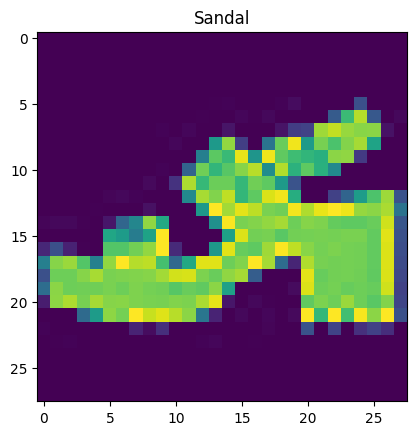

In [242]:
plt.imshow(test_image[0].squeeze())
plt.title(class_names[test_label[0]])

In [243]:
#predicted test image and label
predimage = []
model2.eval()

with torch.inference_mode():
    for i in test_image:
        i = torch.unsqueeze(i, dim=0)
        predlogit = model2(i)
        predprob = torch.softmax(predlogit.squeeze(), dim=0)
        predimage.append(predprob)

predimagetensor = torch.stack(predimage)

In [244]:
predlabel = predimagetensor.argmax(dim=1)
predlabel

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [245]:
predlabel , test_label

(tensor([5, 1, 7, 4, 3, 6, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

In [246]:
test_label_tensor = torch.tensor(test_label)
test_label_tensor

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [247]:
predlabel == test_label_tensor

tensor([ True,  True,  True,  True,  True, False,  True,  True,  True])

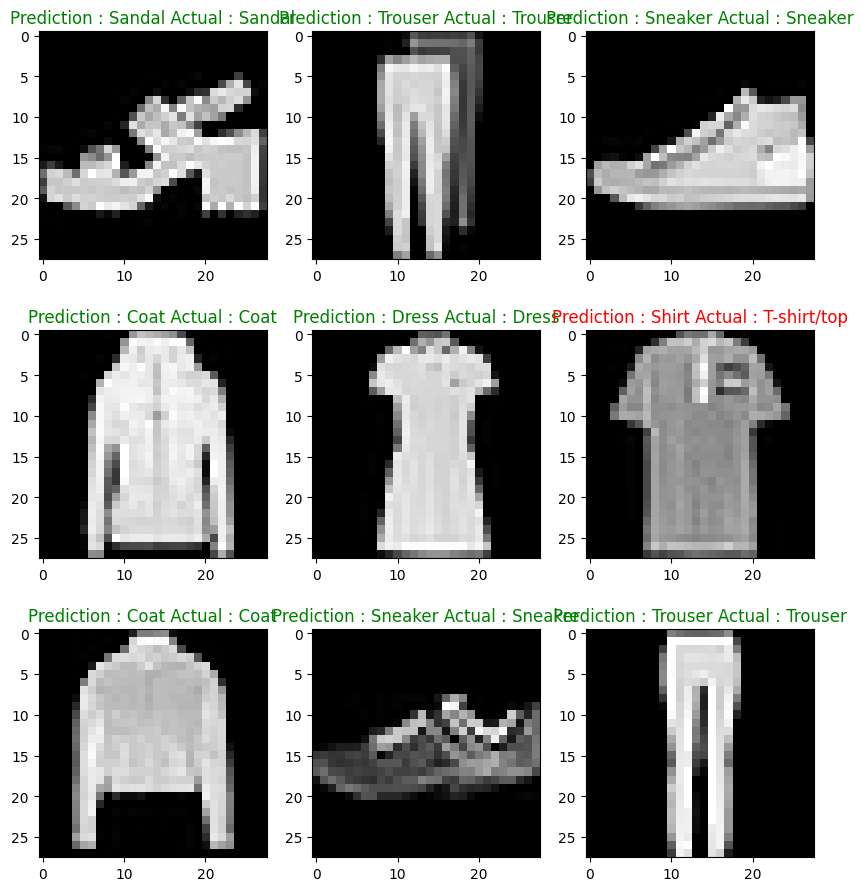

In [248]:
plt.figure(figsize=(10,11))
nrows = 3
ncols = 3
for i , j in enumerate(test_image):
  plt.subplot(nrows , ncols , i+1)
  plt.imshow(j.squeeze(),cmap='gray')
  pred = class_names[predlabel[i]]
  actual = class_names[test_label_tensor[i]]
  titletext = f"Prediction : {pred} Actual : {actual}"

  if pred == actual:
    plt.title(titletext,c='g')
  else:
    plt.title(titletext,c='r')

In [249]:
#another dataset

In [250]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [251]:
train_data = datasets.MNIST(root='data1' , train=True , download = True , transform = transforms.ToTensor())
test_data = datasets.MNIST(root='data1' , train=False , download = True , transform = transforms.ToTensor())

In [252]:
train_data , test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data1
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data1
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [253]:
len(train_data) , len(test_data)

(60000, 10000)

In [254]:
image , label = train_data[0]

In [255]:
image.shape , label

(torch.Size([1, 28, 28]), 5)

In [256]:
len(train_data.data) , len(train_data.targets) , len(test_data.data) ,len(test_data.targets)

(60000, 60000, 10000, 10000)

In [257]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Text(0.5, 1.0, '5 - five')

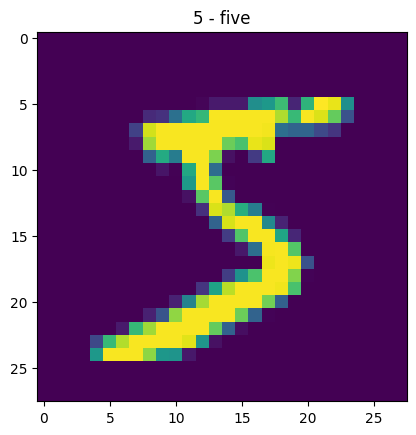

In [258]:
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, '5 - five')

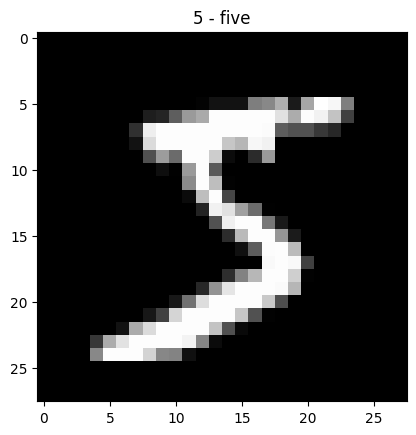

In [259]:
image , label = train_data[0]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

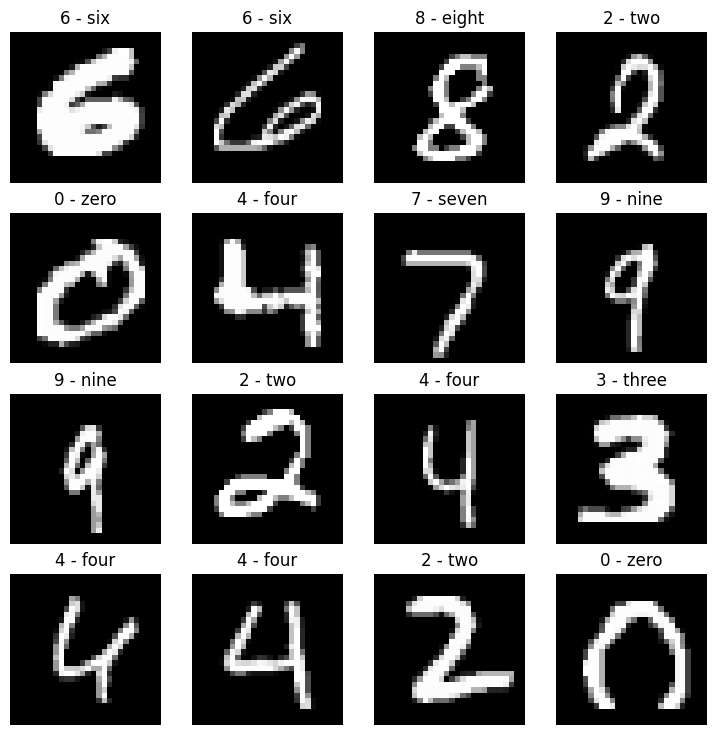

In [260]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [261]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data , batch_size=32 , shuffle=False)

In [262]:
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788a4ffdbd60>,
 <torch.utils.data.dataloader.DataLoader at 0x788a4ffdb0d0>)

In [263]:
train_image_batch , test_label_batch = next(iter(train_dataloader))

In [264]:
train_image_batch , test_label_batch

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [265]:
train_image_batch.shape , train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [266]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [267]:
1875*32

60000

In [268]:
313*32

10016

In [269]:
class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*49,out_features=len(class_names))
    )
  def forward(self , x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x

model3 = CNN1()

In [270]:
model3

CNN1(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [271]:
lossfn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model3.parameters(),lr=0.1)

In [272]:
torch.manual_seed(42)

epochs = 10

for epoch in range(epochs):

    trainloss = 0
    trainacc = 0
    for batch, (x, y) in enumerate(train_dataloader):
        model3.train()

        ypred = model3(x)

        loss = lossfn(ypred, y)
        trainloss += loss
        trainacc += accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    trainloss /= len(train_dataloader)
    trainacc /= len(train_dataloader)

    testloss, testacc = 0, 0
    model3.eval()
    with torch.inference_mode():
        for x, y in test_dataloader:

            testpred = model3(x)

            testloss += lossfn(testpred, y)

            testacc += accuracy_fn(y_true=y, y_pred=testpred.argmax(dim=1))

        testloss /= len(test_dataloader)

        testacc /= len(test_dataloader)

    print(f"Train loss: {trainloss} | Test loss: {testloss} | Train Accuracy : {trainacc} | Test Accuracy : {testacc} ")


Train loss: 0.2834799587726593 | Test loss: 0.062072694301605225 | Train Accuracy : 90.40666666666667 | Test Accuracy : 98.09305111821087 
Train loss: 0.06683481484651566 | Test loss: 0.04475041851401329 | Train Accuracy : 97.83 | Test Accuracy : 98.50239616613419 
Train loss: 0.05219211056828499 | Test loss: 0.04612262174487114 | Train Accuracy : 98.39166666666667 | Test Accuracy : 98.57228434504792 
Train loss: 0.044897500425577164 | Test loss: 0.04680430144071579 | Train Accuracy : 98.57166666666667 | Test Accuracy : 98.3226837060703 
Train loss: 0.03957344964146614 | Test loss: 0.03922520577907562 | Train Accuracy : 98.78833333333333 | Test Accuracy : 98.7020766773163 
Train loss: 0.03560284525156021 | Test loss: 0.03183025121688843 | Train Accuracy : 98.89833333333333 | Test Accuracy : 98.86182108626198 
Train loss: 0.031931281089782715 | Test loss: 0.04539274796843529 | Train Accuracy : 98.995 | Test Accuracy : 98.5223642172524 
Train loss: 0.030591750517487526 | Test loss: 0.031

In [281]:
image , label = test_data[0]

In [282]:
image.shape , label

(torch.Size([1, 28, 28]), 7)

Text(0.5, 1.0, '7 - seven')

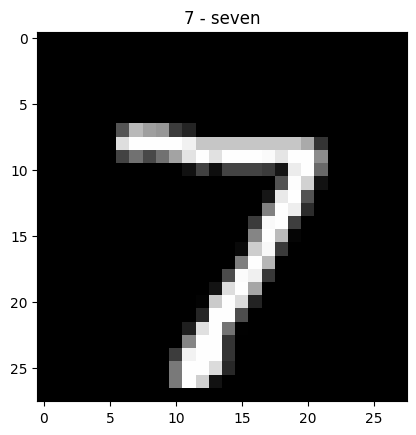

In [284]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

In [286]:
#making prediction
predlogit = model3(image.unsqueeze(dim=0))
predprob = torch.softmax(predlogit,dim=1)
predlabel = torch.argmax(predprob,dim=1)
predlabel , class_names[predlabel]

(tensor([7]), '7 - seven')

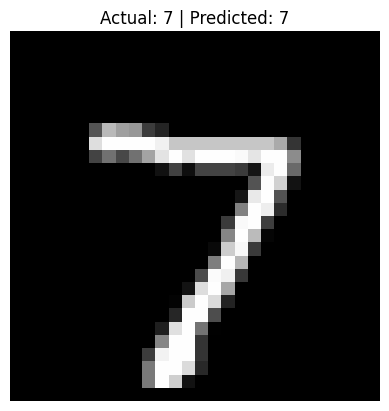

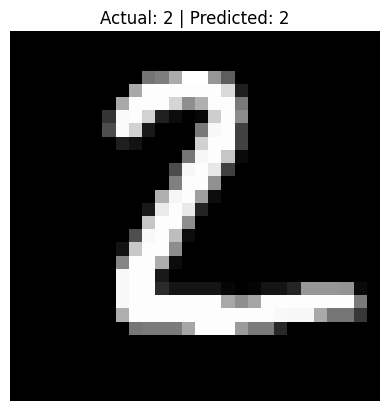

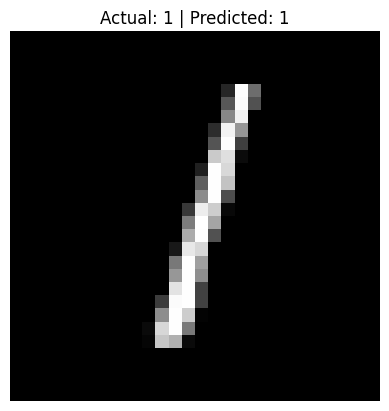

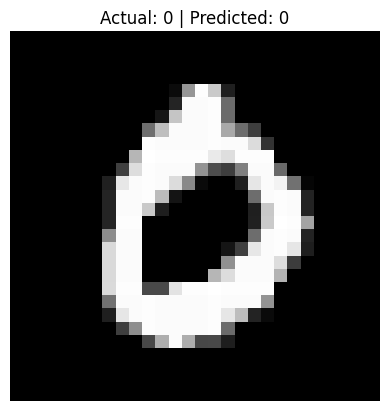

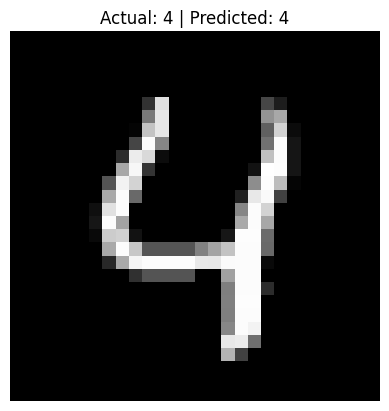

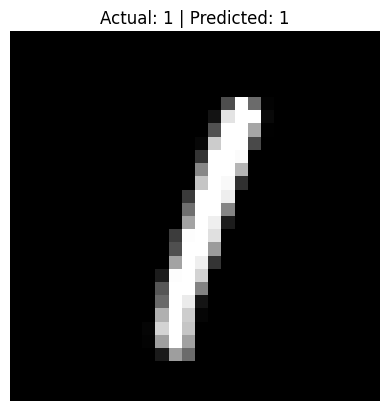

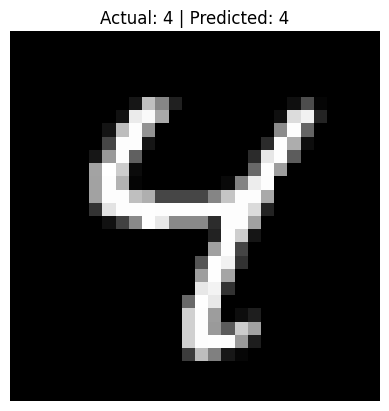

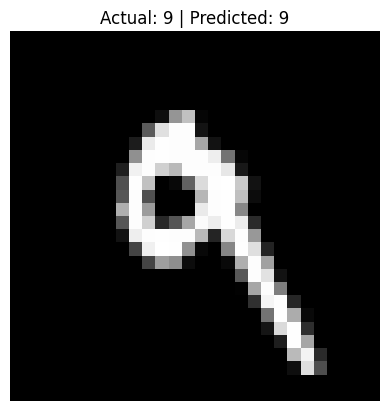

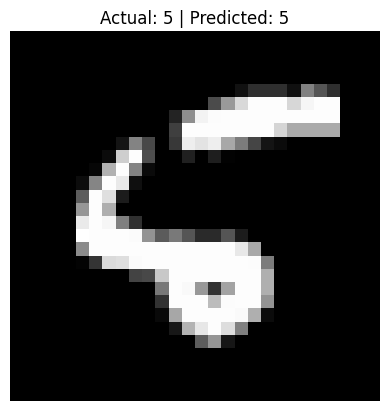

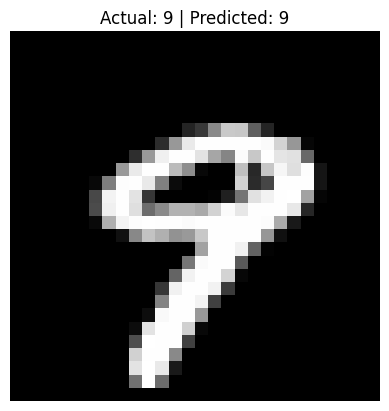

In [294]:
for i in range(10):
    img = test_data[i][0]
    label = test_data[i][1]

    model_pred_logits = model3(img.unsqueeze(dim=0))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Actual: {label} | Predicted: {model_pred_label.item()}")
    plt.axis(False)
    plt.show()